In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
%matplotlib inline

#### Importing DataFrame

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkrishnam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 73.0MB/s]

In [ ]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + '/weatherAUS.csv'

In [ ]:
df = pd.read_csv(train_csv)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Dividing DataFrame into Training, validation and Testing DataFrame

In [ ]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [ ]:
input_cols = df.columns[1:-1].tolist()
target_col = 'RainTomorrow'
print(input_cols, target_col)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday'] RainTomorrow


In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [ ]:
train_inputs[numeric_cols].isnull().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

### Imputing missing numerical values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[numeric_cols])

SimpleImputer()

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling the numeric columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_cols])

In [ ]:
encoded_cols = encoder.get_feature_names_out(categorical_cols).tolist()

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Decision Tree

### Training and Visualization of Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42).fit(X_train, train_target)

In [ ]:
train_pred = model.predict(X_train)

#### Evaluating Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
pd.value_counts(train_pred)

No     76707
Yes    22281
Name: count, dtype: int64

In [ ]:
train_prob = model.predict_proba(X_train)
train_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
train_acc = accuracy_score(train_target, train_pred)
train_acc

0.9999797955307714

- After running accuracy of model on training dataframe model is giving an accuracy of almost 100%

In [ ]:
val_acc = model.score(X_val, val_target)
val_acc

0.7921188555510418

In [ ]:
val_target.value_counts()/len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

- Our model is marginally better than just predicting no every time

- It appears that the model has overfitted

In [ ]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

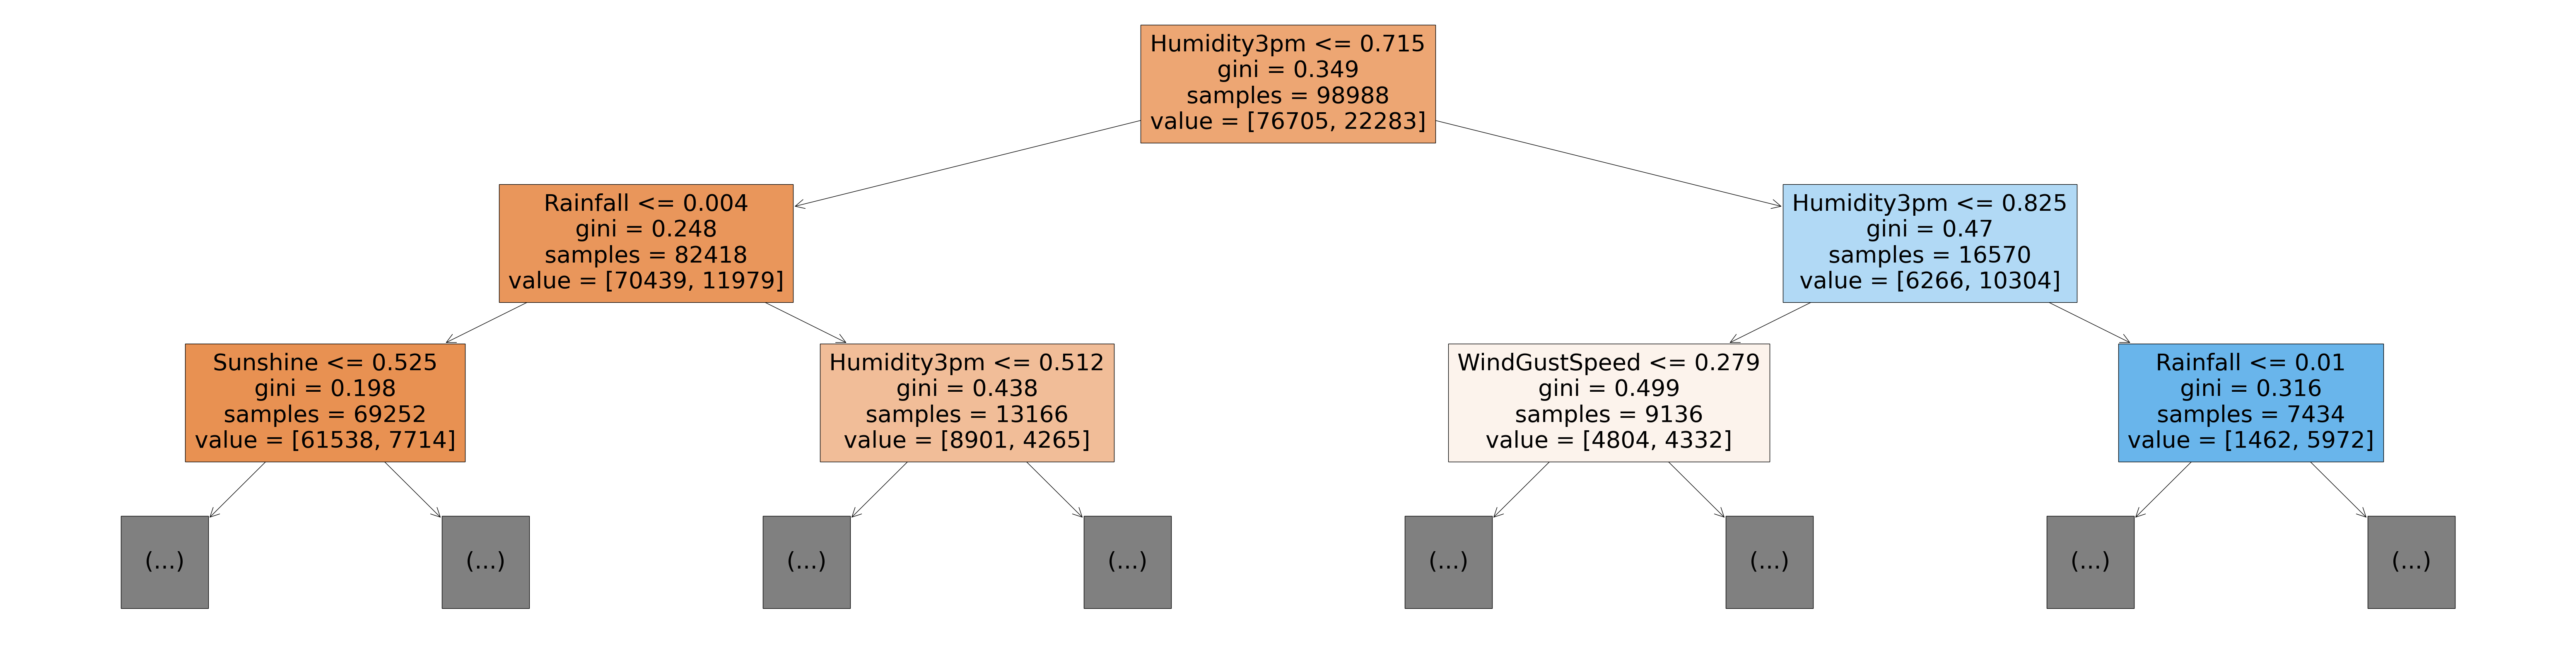

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)


- For learning a non-linear relationship between features and target --> try out logistic and decision tree

- The reason for the 100% accuracy of the training dataset is that it has learned or memorized the all the pattern in the training dataset in a form of a decision tree

In [ ]:
model.tree_.max_depth

48

In [ ]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:1000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [ ]:
print(X_train.columns.tolist())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
print(model.feature_importances_.tolist())

[0.03489420855285962, 0.0323605485657469, 0.059138566762334845, 0.024961990730917785, 0.04946521434493767, 0.05633346730127233, 0.02802059979750261, 0.029812880134464946, 0.04021829076645068, 0.2614412967588388, 0.03441450265980312, 0.06205736985717437, 0.013640617592230803, 0.016922986638968705, 0.03500015500292748, 0.03040640764934235, 0.0022408658692490246, 0.0020801810426264817, 0.0012747595442876964, 0.0007269363237360698, 0.0013977951712060301, 0.0011526487263537589, 0.0006928081590049861, 0.0018067559833347246, 0.001083709006968229, 0.001197738951804092, 0.0008871191033542155, 0.0021576421991075976, 0.0016709473143048292, 7.989194932166441e-05, 0.0011055866776184546, 0.0014200865637629821, 0.00041008763543685115, 0.0010902811470157464, 0.0014416476591342395, 0.000908284767325482, 0.0010577030370966332, 0.0006181334553148229, 0.0018038727218488689, 0.0021040352651320086, 0.0002744133330181011, 0.000731599404716386, 0.001354089902272186, 0.001547593322911268, 0.001309175637987557,

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


<Axes: xlabel='importance', ylabel='feature'>

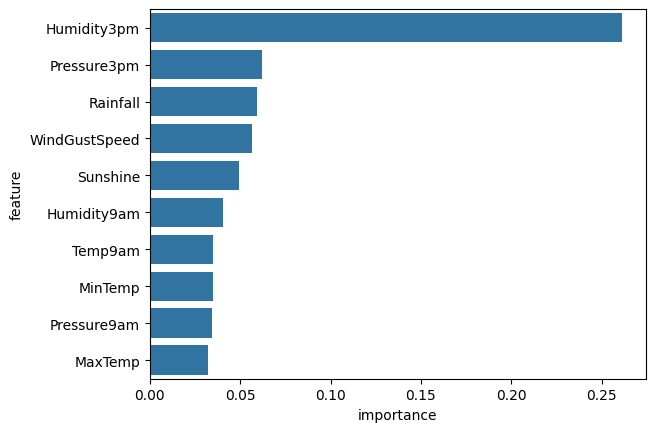

In [ ]:
sns.barplot(importance_df.head(10), x='importance', y='feature')

### Hyperparameter Tuning and Overfitting

- Regularization is done to reduce overfitting
- Hyperparameter is the parameter given to the model by us

In [ ]:
train_model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
train_model2.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
train_model2.score(X_train, train_target)

0.8291308037337859

In [ ]:
train_model2.score(X_val, val_target)

0.8334397307178921

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsamples = 5583\nvalue = [3457, 2126]'),
 Text(0.6875, 0.125, 'gini = 0.471

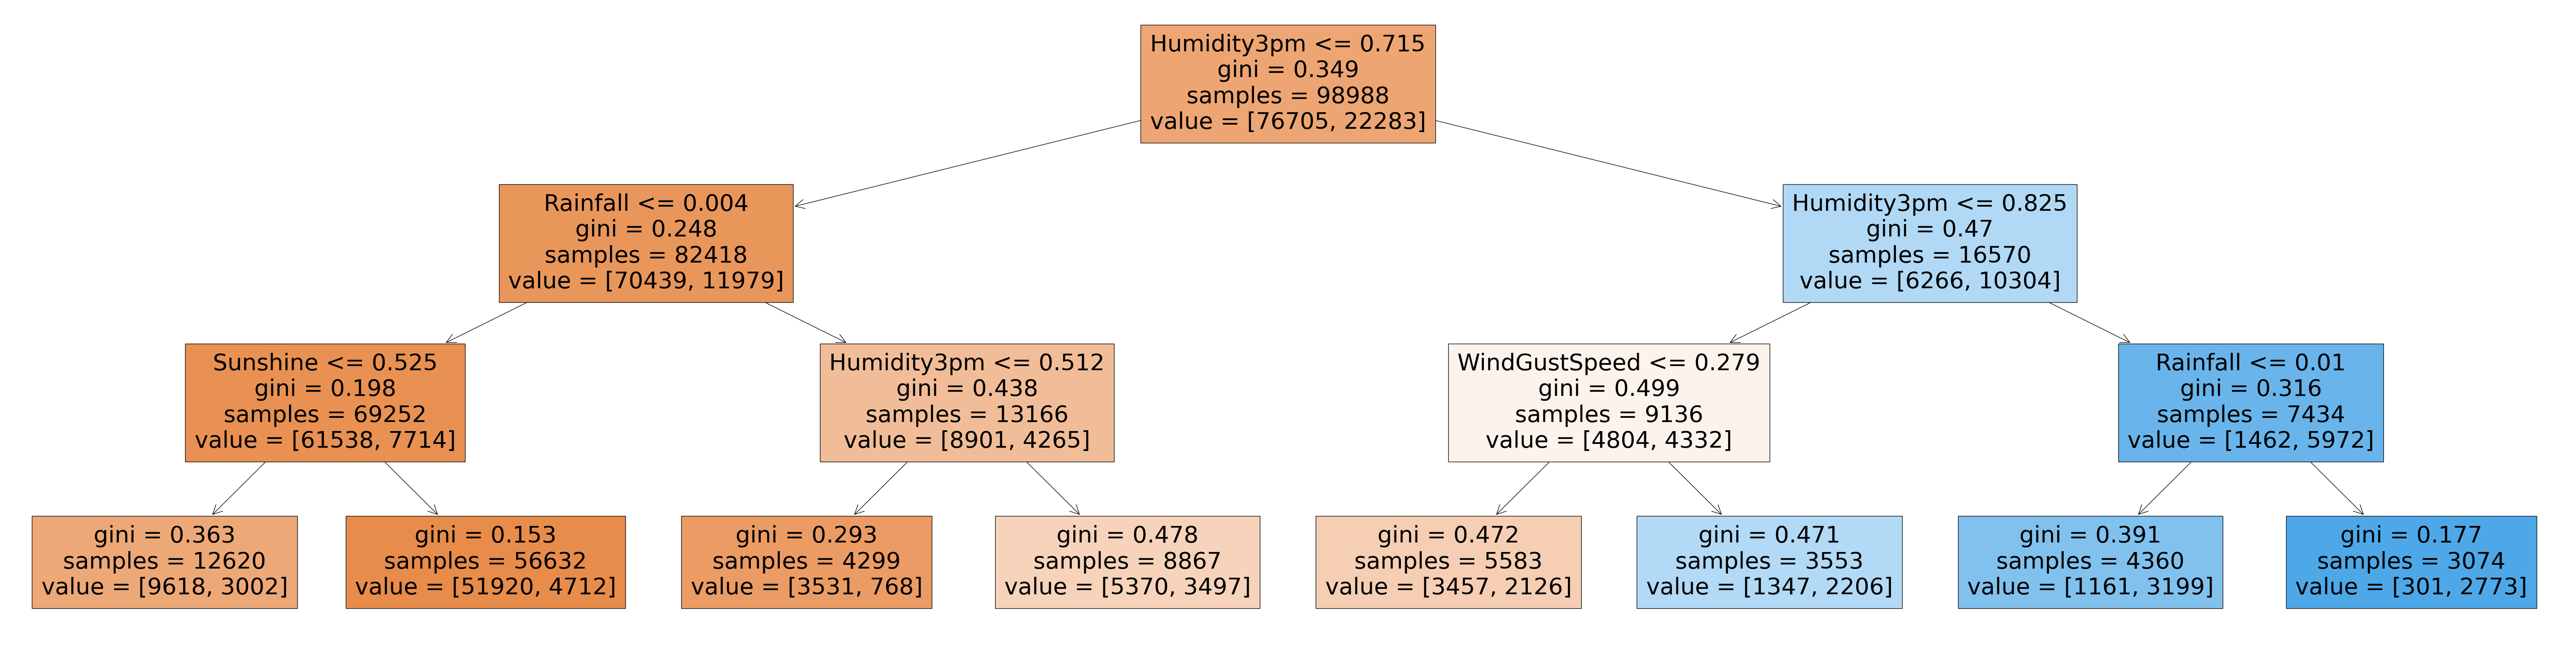

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(train_model2, feature_names=X_train.columns, filled=True)


> max_depth

In [ ]:

def get_depth_error(depth):
  model = DecisionTreeClassifier(max_depth=depth, random_state=42)
  model.fit(X_train, train_target)
  training_error = 1 - model.score(X_train, train_target)
  validation_error = 1 - model.score(X_val, val_target)
  return {'max_depth': depth, 'training_error': training_error, 'validation_error': validation_error}


In [ ]:
%%time
model_df = pd.DataFrame([get_depth_error(depth) for depth in range(1, 20)])
model_df

CPU times: user 45.2 s, sys: 1.23 s, total: 46.4 s
Wall time: 54.6 s


,max_depth,training_error,validation_error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


- Minimum validation error is on the depth of 7

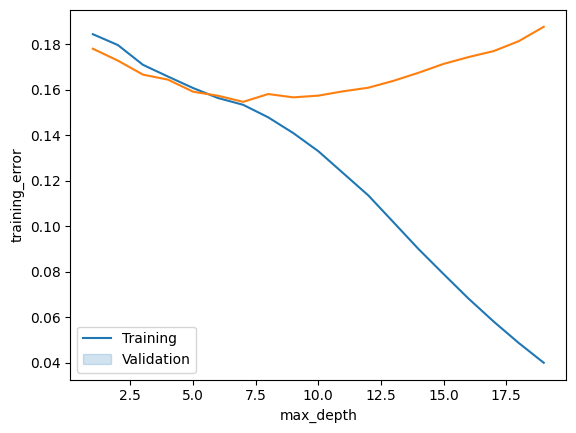

In [ ]:
sns.lineplot(data=model_df, y='training_error', x='max_depth')
sns.lineplot(data=model_df, y='validation_error', x='max_depth')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
train_model = DecisionTreeClassifier(max_depth=7, random_state=42)
train_model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
train_model.score(X_train, train_target)

0.8466884874934335

In [ ]:
train_model.score(X_val, val_target)

0.8453949277465034

> max_leaf_node
- Another way to control the complexity of the model

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_train, train_target)

0.8480421869317493

In [ ]:
model.score(X_val, val_target)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

In [ ]:
def best_params(depth, node):
  accuracy = 0
  params={}
  for i in depth:
    for j in node:
      model = DecisionTreeClassifier(max_leaf_nodes=j, max_depth=i, random_state=42)
      model.fit(X_train, train_target)
      validation_acc = model.score(X_val, val_target)
      if validation_acc > accuracy:
        accuracy = validation_acc
        params = {'depth': i, 'node': j, 'accuracy': validation_acc}
  return params


In [ ]:
model_df = best_params([10,11,12,13,14], [160,161,162,163,164])

In [ ]:
model_df

{'depth': 10, 'node': 160, 'accuracy': 0.8455109976205676}

In [ ]:
model = DecisionTreeClassifier(min_weight_fraction_leaf=0.001, max_depth=8, criterion='entropy', random_state=42).fit(X_train, train_target)
model.score(X_train, train_target)


0.8480421869317493

In [ ]:
model.score(X_val, val_target)

0.845743137368696

In [ ]:
model.score(X_test, test_target)

0.834026334026334

- I think this the maximum accuracy we can get, after trying many of the hyperparameter

In [ ]:
model = DecisionTreeClassifier(min_weight_fraction_leaf=0.001, max_depth=8, random_state=42).fit(X_train, train_target)
model.score(X_val, val_target)


0.8435958446985085

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

- n_jobs allows the random forest to use mulptiple parallel workers to train decision tree, and random_state=42 ensures that we get same results for each execution

In [ ]:
%%time
model.fit(X_train, train_target)

CPU times: user 41.2 s, sys: 329 ms, total: 41.6 s
Wall time: 36.7 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_target)

0.9999494888269285

In [ ]:
model.score(X_val, val_target)

0.8566537055307295

- This general technique of combining the resuls of many models is called 'ensembling'
- We train different models on little little dataset and then average the prediction to predict the output

In [ ]:
train_prob = model.predict_proba(X_train)
train_prob

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [ ]:
len(model.estimators_)

100

- by default we have random forest of 100 decision trees

In [ ]:
print(model.estimators_[0])

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]'),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570, 2734]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]'),
 Text(0.625, 0.375, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514, 7796]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure9am <= 0.614\ngini = 0.475\nsamples = 9359\nvalue = [9101, 5763]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

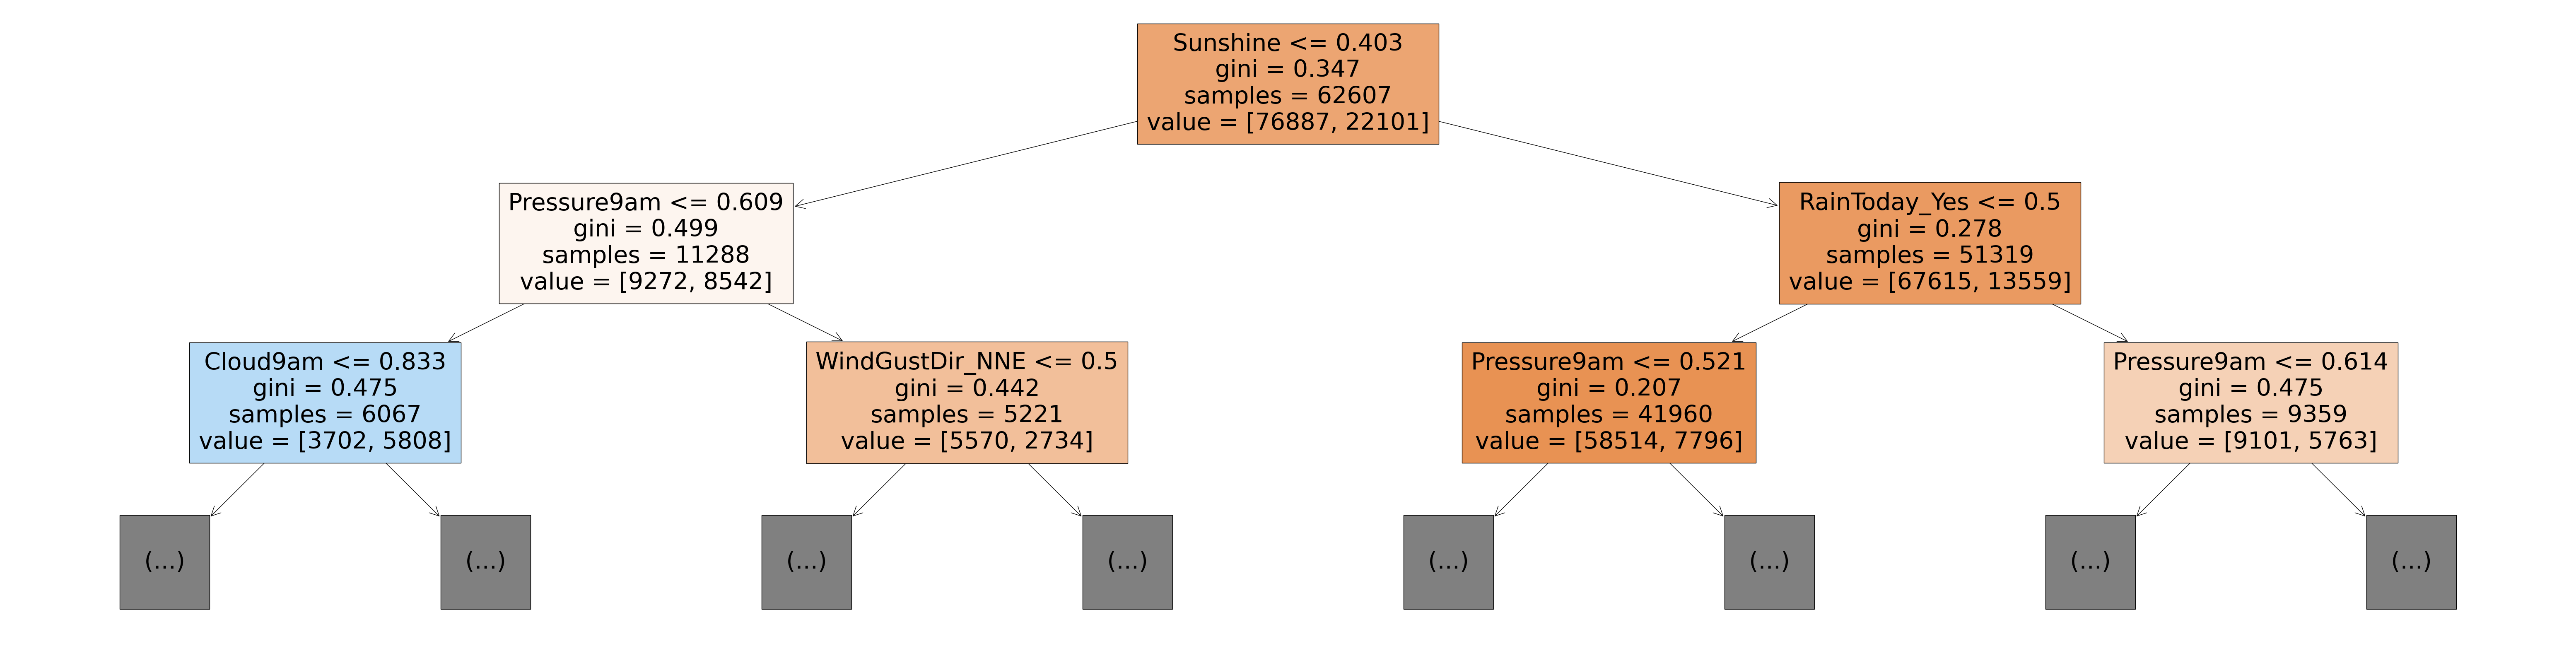

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, filled=True, feature_names=X_train.columns)

[Text(0.5, 0.875, 'Sunshine <= 0.417\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.745\ngini = 0.499\nsamples = 11821\nvalue = [9860, 8914]'),
 Text(0.125, 0.375, 'Humidity3pm <= 0.625\ngini = 0.45\nsamples = 7988\nvalue = [8315, 4320]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.217\ngini = 0.377\nsamples = 3833\nvalue = [1545, 4594]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Location_MountGinini <= 0.5\ngini = 0.278\nsamples = 50627\nvalue = [66847, 13367]'),
 Text(0.625, 0.375, 'Location_Moree <= 0.5\ngini = 0.273\nsamples = 49365\nvalue = [65436, 12778]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Humidity9am <= 0.665\ngini = 0.416\nsamples = 1262\nvalue = [1411, 589]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')

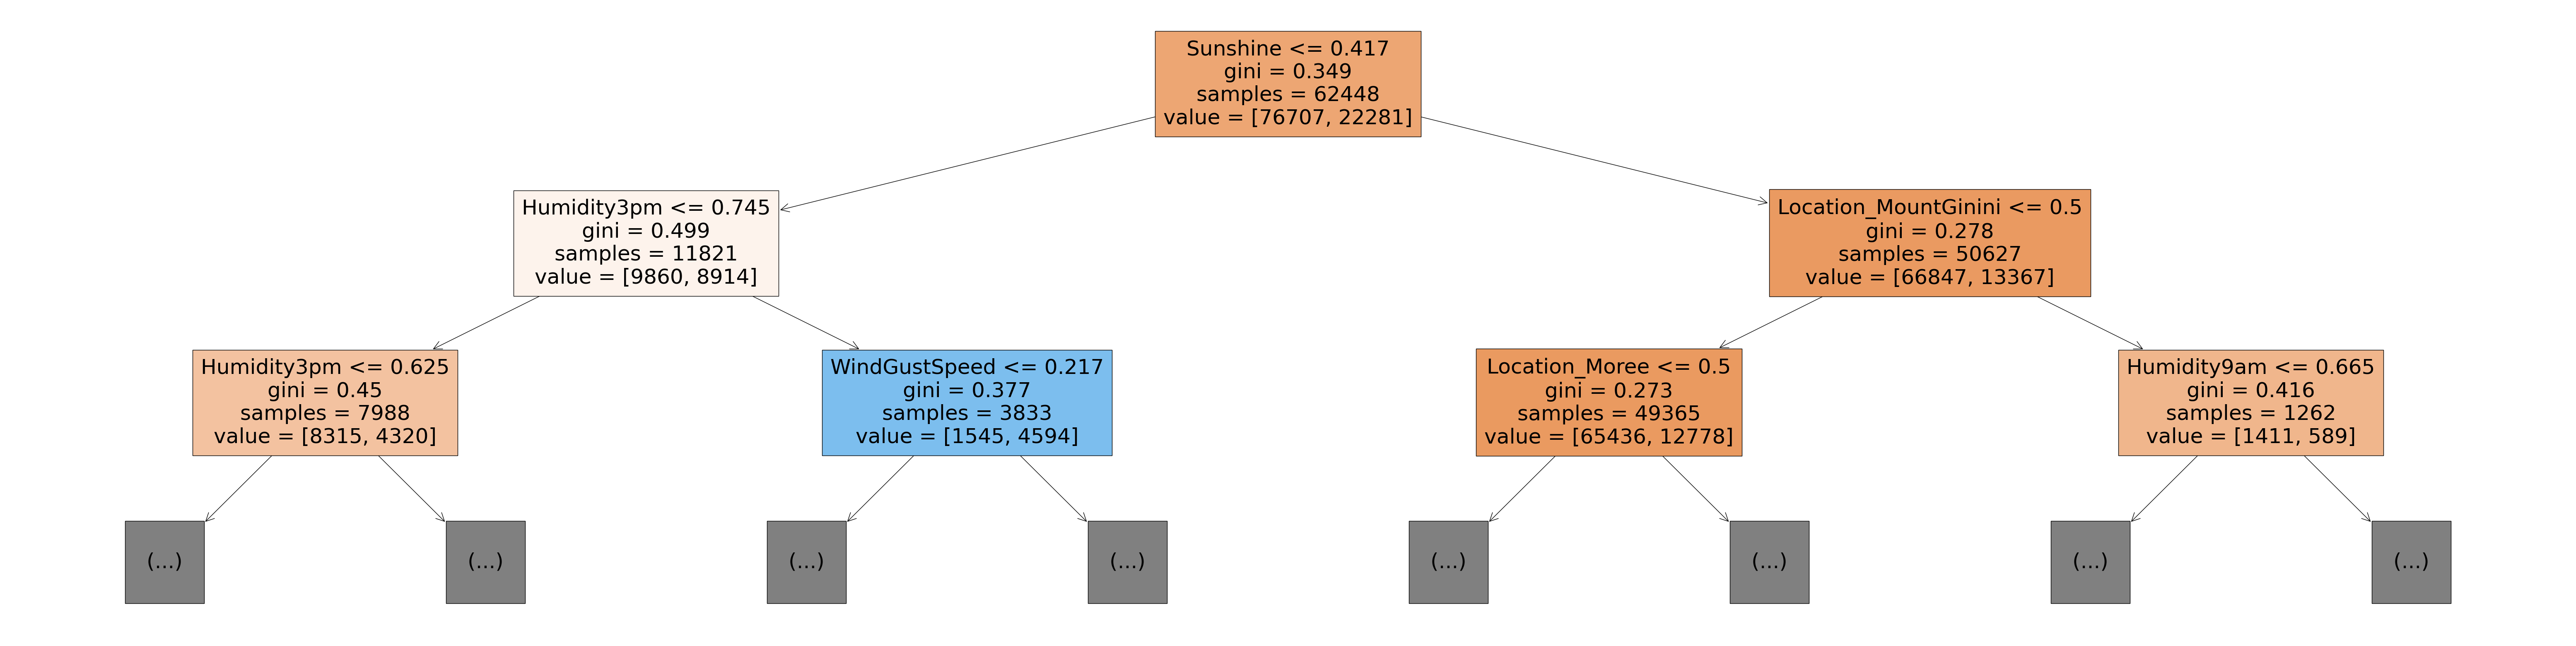

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True)

- Just like Decision Tree, Random Forest also assign some importance to each feature

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


### Hyperparameter Tuning with Random Forests

In [ ]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=42).fit(X_train, train_target)


In [ ]:
base_train_acc = base_model.score(X_train, train_target)
base_val_acc = base_model.score(X_val, val_target)

In [ ]:
base_train_acc, base_val_acc

(0.9999494888269285, 0.8566537055307295)

> n_estimators
- This hyperparameter controls the decision trees in random forest

- Increase in some sort of randomness helps in reducing overfitting

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500).fit(X_train, train_target)


In [ ]:
model.score(X_train, train_target)

0.9999797955307714

In [ ]:
model.score(X_val, val_target)

0.8577563693343393

- On increasing the n_estimators to 5 time it just result in increase of only 0.2% accuracy on increase of training model to singnificant duration
- Sould I bother about this much, answer may be yes or no depending on the scenario